# 행복 지수 예측을 위한 다중 선형 회귀  
- https://www.kaggle.com/unsdsn/world-happiness

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 데이터 입력(156x9)
df = pd.read_csv('./data/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


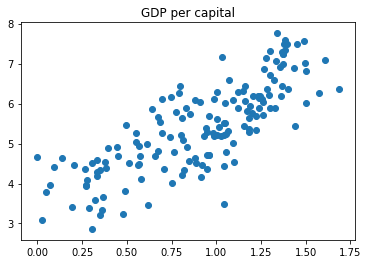

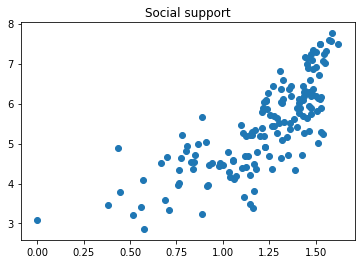

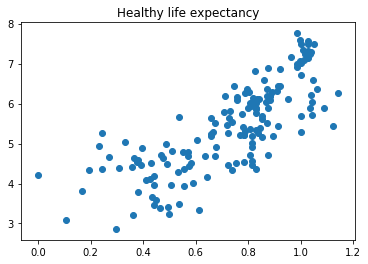

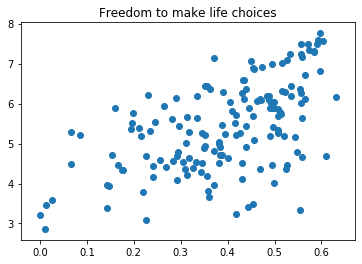

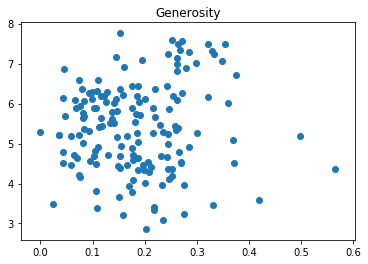

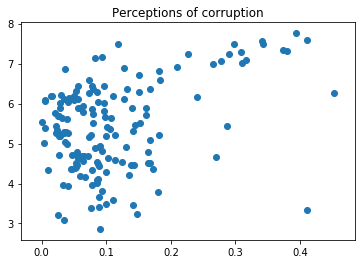

In [3]:
# 변인간 선형관계 검증
plt.title('GDP per capital')
plt.scatter(df["GDP per capita"], df["Score"])
plt.show()

plt.title('Social support')
plt.scatter(df["Social support"], df["Score"])
plt.show()

plt.title('Healthy life expectancy')
plt.scatter(df["Healthy life expectancy"], df["Score"])
plt.show()

plt.title('Freedom to make life choices')
plt.scatter(df["Freedom to make life choices"], df["Score"])
plt.show()

plt.title('Generosity')
plt.scatter(df["Generosity"], df["Score"])
plt.show()

plt.title("Perceptions of corruption")
plt.scatter(df["Perceptions of corruption"], df["Score"])
plt.show()


In [4]:
df.corr()  # 독립 변인 상관

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


In [5]:
# 입력 속성과 결과치 구분
x = np.array(df.drop(["Overall rank", "Score", "Generosity", "Country or region"], axis = 1).values)  # (156x5)
y = df.loc[:, "Score"].values   # (156x1)

### Linear Regression

In [6]:
ones = np.ones((x.shape[0], 1))  # 1로 구성된 열 벡터

X=np.column_stack((x, ones))  # 행렬 계산을 위해 ones 행렬 결합

In [7]:
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)  # 행렬 계산

m = w[:5]; b=w[5]  # m = 속성별 기울기, b = 절편
predict_y = np.zeros(y.shape)  

count=0
for tmp_x in x:
    predict_y[count] = np.sum(tmp_x*m)+b  # predict_y = 계산된 기울기와 절편을 통한 예측치 
    count = count +1

RMS2 = np.linalg.norm(predict_y - y)/y.shape[0]  # 예측치와 실제 점수의 거리(벡터 차의 제곱합)
print(RMS2)

0.041881753569791506


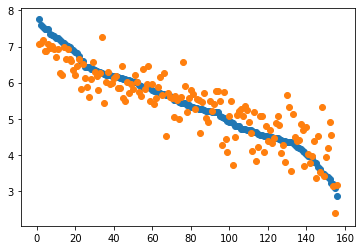

In [8]:
# 모델의 효과를 확인하기 위해 구현
plt.scatter(df["Overall rank"], y)  # 2차원 그래프로 표현하기 위해 순위 사용
plt.scatter(df["Overall rank"], predict_y)  
plt.show()

In [9]:
w  # 속성별 기울기와 절편

array([0.74545268, 1.1180315 , 1.08401615, 1.53400938, 1.11755314,
       1.86887247])